In [1]:
## import imagery results from 'Intertidal_seagrass.ipynb'
%store -r results2

In [30]:
# ## Save imagery results
# import pickle

# with open('Burrum_Heads_polygons_imagery_results2dict.pickle', 'wb') as handle:
#     pickle.dump(results2, handle)

In [2]:
## Import modules/libraries
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## Import seagrass watch point data
%cd '/home/jovyan/dev/dea-notebooks/Claire/'
# point_data = 'Manual_translation_of BH1_and_BH3_pc_seagrass_cover_from_seagrasswatchdotorg.csv'
point_data = 'Manual_translation_of BH1_and_BH3_from_seagrasswatchdotorg.csv'
field_df = pd.read_csv(point_data)
# # Remove empty rows
# field_df = field_df.loc[0:56]
## Turn string dates into datetimes
field_df['time'] = pd.to_datetime(field_df['Date'], format='%b-%y')
## Replace index
field_df.set_index(field_df.time, inplace=True)

/home/jovyan/dev/dea-notebooks/Claire


In [4]:
# field_df

In [5]:

BH1_NDVI = results2['5']['4'].resample(time='1MS').mean(dim='time')
BH1_NDVI = BH1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
BH1_NDVI = BH1_NDVI.to_dataframe()
BH1_NDVI = BH1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'BH1_NDVI'})
BH1_NDVI = BH1_NDVI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()

In [6]:

BH3_NDVI = results2['50']['9'].resample(time='1MS').mean(dim='time')
BH3_NDVI = BH3_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
BH3_NDVI = BH3_NDVI.to_dataframe()
BH3_NDVI = BH3_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'BH3_NDVI'})
BH3_NDVI = BH3_NDVI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

In [7]:
# field_df.head()

In [8]:
## Create empty continuous daterange to join dataframes to
from datetime import date, timedelta

start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'

alldates = pd.DataFrame(index=date_range)

## Join BH1

alldates_BH1 = alldates.join(BH1_NDVI, how='left')

## Join BH3

alldates_BH1_BH3 = alldates_BH1.join(BH3_NDVI, how='left')

## Join field_df (seagrasswatch observations)

alldates_all = alldates_BH1_BH3.join(field_df, how='left')

In [9]:
# alldates_all.tail(375)
# BH1_NDVI.plot()
field_df.columns

Index(['Date', 'BH1 % seagrass cover', 'BH3 % seagrass cover',
       'BH1 Canopy height (cm)', 'BH3 Canopy height (cm)', 'BH1 % algae cover',
       'BH3 % algae cover', 'BH1 % epiphyte cover', 'BH3 % epiphyte cover',
       'time'],
      dtype='object')

(729755.0, 738445.0)

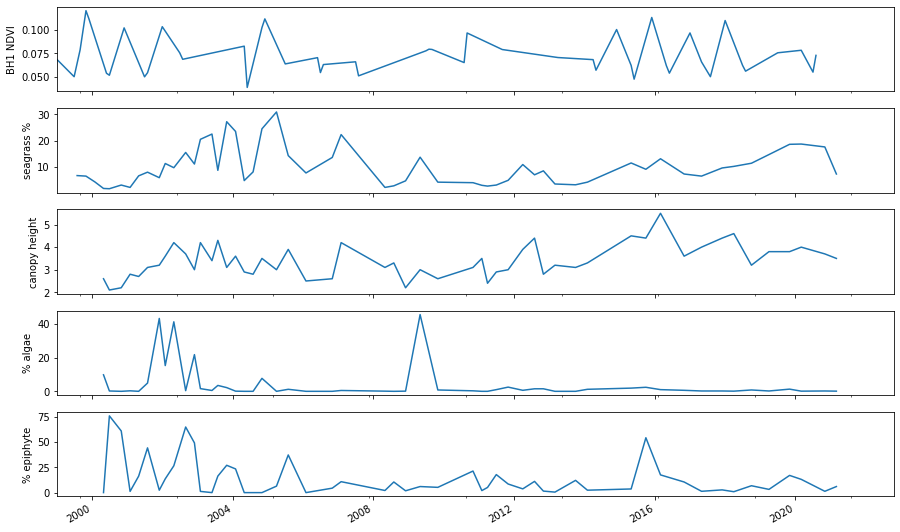

In [10]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15,10), sharex=True)
alldates_all.BH1_NDVI.dropna(axis='index').plot(ax=ax1)
alldates_all['BH1 % seagrass cover'].dropna(axis='index').plot(ax=ax2)
alldates_all['BH1 Canopy height (cm)'].dropna(axis='index').plot(ax=ax3)
alldates_all['BH1 % algae cover'].dropna(axis='index').plot(ax=ax4)
alldates_all['BH1 % epiphyte cover'].dropna(axis='index').plot(ax=ax5)

ax1.set_ylabel('BH1 NDVI')
ax2.set_ylabel('seagrass %')
ax3.set_ylabel('canopy height')
ax4.set_ylabel('% algae')
ax5.set_ylabel('% epiphyte')

ax1.set_xlim(xmin='1999') 

(729755.0, 738445.0)

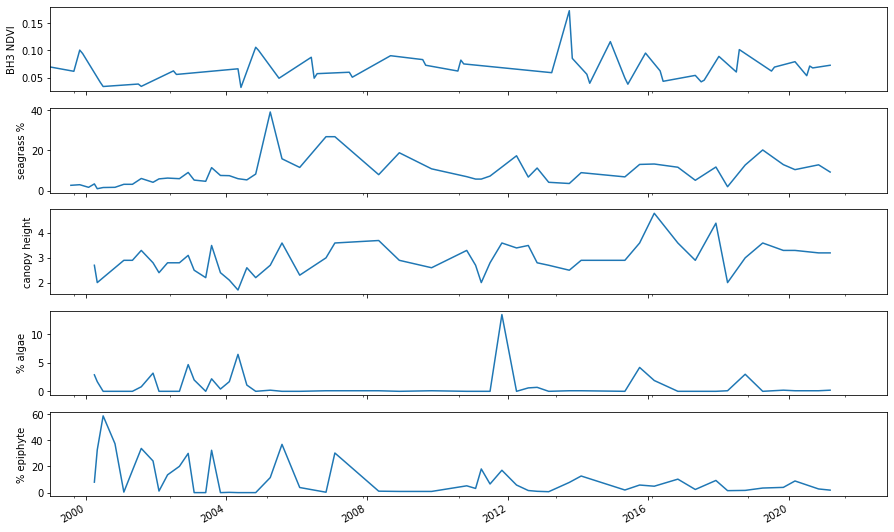

In [28]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15,10), sharex=True)
alldates_all.BH3_NDVI.dropna(axis='index').plot(ax=ax1)
alldates_all['BH3 % seagrass cover'].dropna(axis='index').plot(ax=ax2)
alldates_all['BH3 Canopy height (cm)'].dropna(axis='index').plot(ax=ax3)
alldates_all['BH3 % algae cover'].dropna(axis='index').plot(ax=ax4)
alldates_all['BH3 % epiphyte cover'].dropna(axis='index').plot(ax=ax5)

ax1.set_ylabel('BH3 NDVI')
ax2.set_ylabel('seagrass %')
ax3.set_ylabel('canopy height')
ax4.set_ylabel('% algae')
ax5.set_ylabel('% epiphyte')

ax1.set_xlim(xmin='1999') 

In [57]:
# field_df.head()

In [16]:
testmerge = BH1_NDVI.join(BH3_NDVI, how='left')
testmerge2 = pd.merge(testmerge, field_df, left_on=testmerge.index, right_on=field_df.index)
testmerge2.drop('key_0', axis=1)
testmerge2.set_index('time', drop=True)

,key_0,BH1_NDVI,BH3_NDVI,Date,BH1 % seagrass cover,BH3 % seagrass cover,BH1 Canopy height (cm),BH3 Canopy height (cm),BH1 % algae cover,BH3 % algae cover,BH1 % epiphyte cover,BH3 % epiphyte cover
time,,,,,,,,,,,,
1999-11-01,1999-11-01,0.119839,0.100681,Nov-99,6.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-01,2000-07-01,0.052018,0.033417,Jul-00,1.7,1.5,2.1,2.2,0.2,0.0,75.8,58.7
2001-08-01,2001-08-01,0.054658,0.033679,Aug-01,8.0,6.0,3.1,3.3,4.9,0.8,44.2,33.8
2004-05-01,2004-05-01,0.082558,0.066132,May-04,4.8,5.9,2.9,1.7,0.0,6.5,0.0,0.0
2004-11-01,2004-11-01,0.102097,0.105975,Nov-04,24.5,8.2,3.5,2.2,7.7,0.0,0.0,0.0
2015-05-01,2015-05-01,0.062349,0.048976,May-15,11.5,6.8,4.5,2.9,1.9,0.0,3.6,2.0
2017-05-01,2017-05-01,0.065974,0.053954,May-17,6.5,5.1,4.0,2.9,0.2,0.0,1.3,2.4
2020-03-01,2020-03-01,0.078247,0.079297,Mar-20,18.7,10.4,4.0,3.3,0.1,0.1,13.1,8.9


In [66]:
k[1]

key_0                     2020-03-01 00:00:00
BH1_NDVI                            0.0782468
BH3_NDVI                            0.0792974
Date                                   Mar-20
BH1 % seagrass cover                     18.7
BH3 % seagrass cover                     10.4
BH1 Canopy height (cm)                      4
BH3 Canopy height (cm)                    3.3
BH1 % algae cover                         0.1
BH3 % algae cover                         0.1
BH1 % epiphyte cover                     13.1
BH3 % epiphyte cover                      8.9
time                      2020-03-01 00:00:00
Name: 7, dtype: object

Text(0.5, 1.0, '% epiphyte cover')

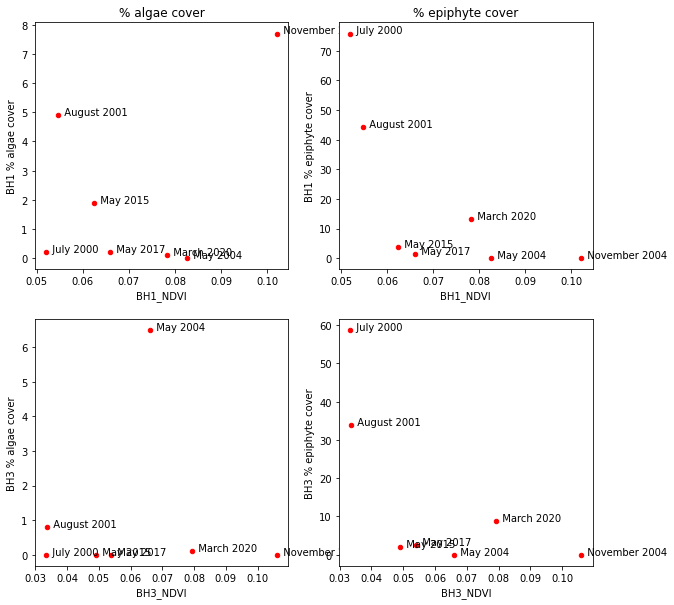

In [24]:
# fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
fig, ((ax5,ax7),(ax6,ax8)) = plt.subplots(2,2, figsize=(10,10))

# testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
# testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax2, color='red')
# testmerge2.plot(x='BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax3, color='red')
# testmerge2.plot(x='BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in testmerge2.iterrows():
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][7]))
    ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
    ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][9]))
    ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))
    ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][11]))
    
# ax1.set_title('% seagrass cover')
# ax3.set_title('Canopy height (cm)')
ax5.set_title('% algae cover')
ax7.set_title('% epiphyte cover')

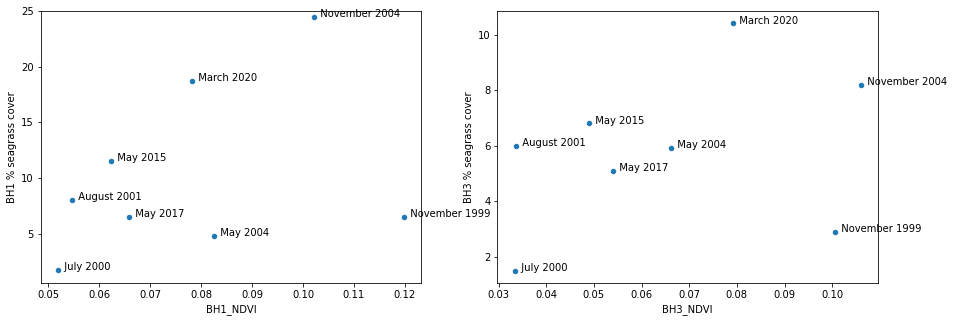

In [12]:
testmerge = BH1_NDVI.join(BH3_NDVI, how='left')
testmerge2 = pd.merge(testmerge, field_df, left_on=testmerge.index, right_on=field_df.index)
testmerge2.drop('key_0', axis=1)
testmerge2.set_index('time', drop=True)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1)
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax2)

ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in testmerge2.iterrows():
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
    ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))

In [13]:
fig, ax = plt.subplots()
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax)

for k in testmerge2.iterrows():
    ax.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][], k[1][5]))

SyntaxError: invalid syntax (<ipython-input-13-704e5d65d178>, line 5)

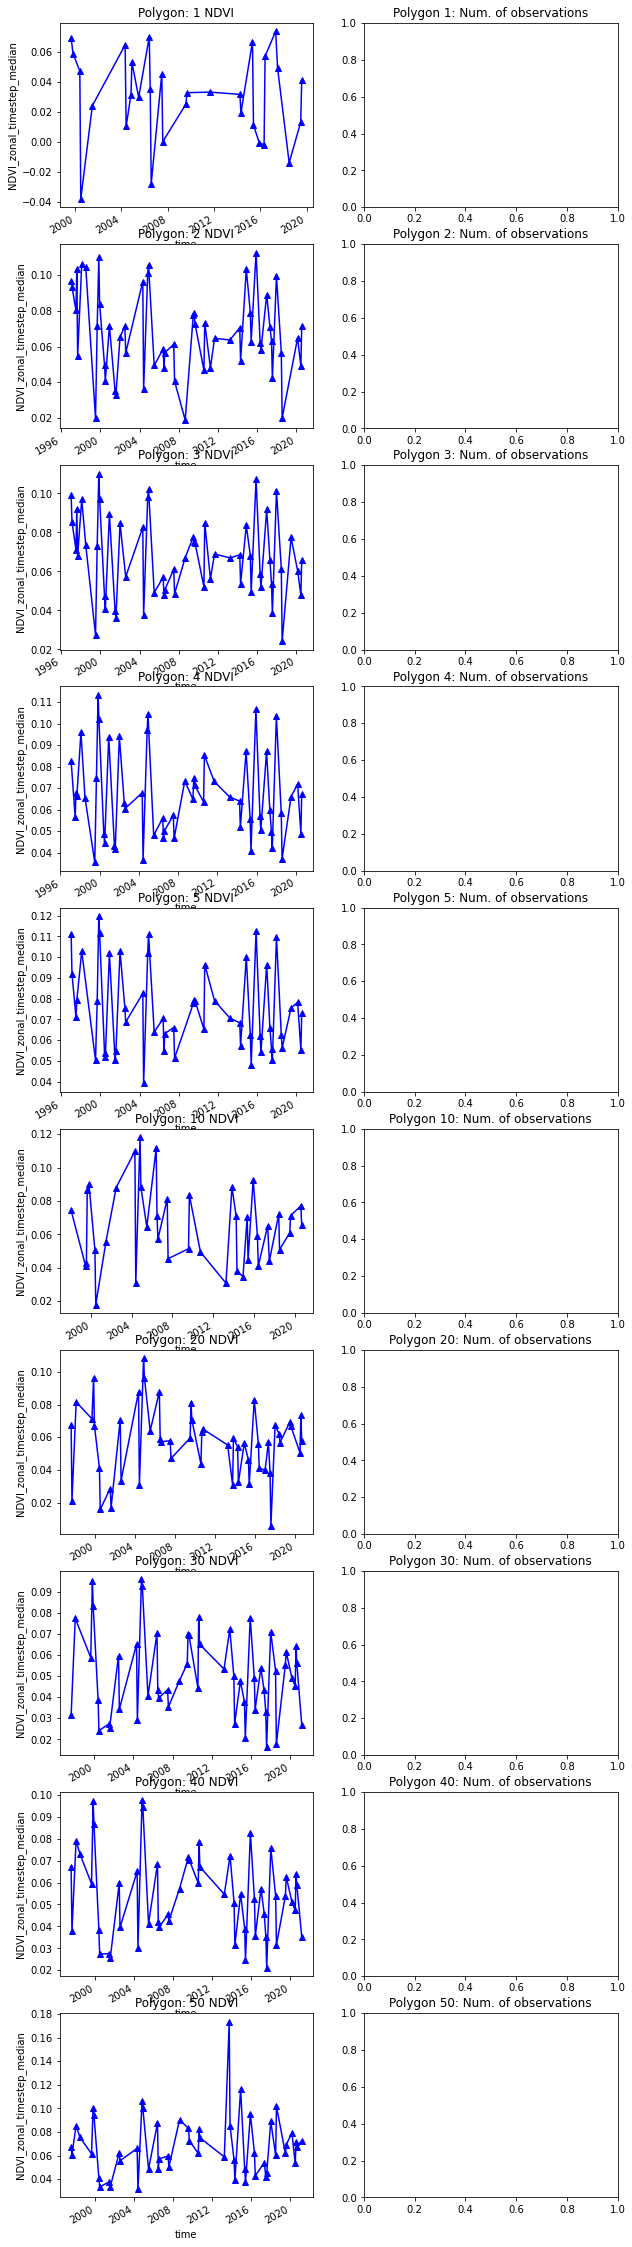

In [14]:
## Plot polygon seasonal means (of timestep medians)

j=0
fig, axes = plt.subplots(nrows=len(results2), ncols=2,  figsize=(10, (len(results2)*4))) # sharex=True,
for k in results2:
    for kk in results2[k]:
        median = results2[k][kk].resample(time='1MS').mean(dim='time')
        medianarray =  median.NDVI_zonal_timestep_median.dropna(dim='time')
        medianarray[14:].plot.line('b-^', ax=axes[j,0])
        
        
#         median = results2[k][kk].groupby('time.year').mean(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         median.plot.scatter(ax=axes[j,0], x='time', y='NDVI_zonal_timestep_median', color='red')
        

#         std = results2[k][kk].groupby('time.month').std(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         (median + std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
#         (median - std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
        
#         obscounts =  results2[k][kk].groupby('time.month').count(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         obscounts.plot.scatter(ax=axes[j,1], x='month', y='NDVI_zonal_timestep_median')#, type='histogram')
        
        axes[j,0].title.set_text('Polygon: ' + str(k) + ' NDVI')
        axes[j,1].title.set_text('Polygon ' + str(k) + ': Num. of observations')
        j=j+1

plt.show()

In [173]:
print(testmerge2.index) # Merge hasn't worked properly. Dates missing.
field = field_df.index
bh3ndvi = BH3ndvi.time

DatetimeIndex(['1999-11-01', '2000-07-01', '2001-08-01', '2004-05-01',
               '2004-11-01', '2015-05-01', '2017-05-01', '2020-03-01'],
              dtype='datetime64[ns]', name='time', freq=None)


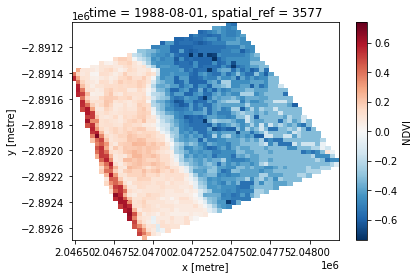

In [165]:
BH3ndvi.isel(time=0).NDVI.plot()#(index=0)

In [181]:
# bh3ndvi = bh3ndvi.to_dataframe()
type(field)

pandas.core.indexes.datetimes.DatetimeIndex

In [182]:
bh3ndvi = bh3ndvi.index
field

DatetimeIndex(['1999-08-01', '1999-11-01', '2000-02-01', '2000-04-01',
               '2000-05-01', '2000-07-01', '2000-11-01', '2001-02-01',
               '2001-05-01', '2001-08-01', '2001-12-01', '2002-02-01',
               '2002-05-01', '2002-09-01', '2002-12-01', '2003-02-01',
               '2003-06-01', '2003-08-01', '2003-11-01', '2004-02-01',
               '2004-05-01', '2004-08-01', '2004-11-01', '2005-04-01',
               '2005-08-01', '2006-02-01', '2006-11-01', '2007-02-01',
               '2008-05-01', '2008-08-01', '2008-12-01', '2009-05-01',
               '2009-11-01', '2010-11-01', '2011-02-01', '2011-04-01',
               '2011-07-01', '2011-11-01', '2012-04-01', '2012-08-01',
               '2012-11-01', '2013-03-01', '2013-10-01', '2014-02-01',
               '2015-05-01', '2015-10-01', '2016-03-01', '2016-11-01',
               '2017-05-01', '2017-12-01', '2018-04-01', '2018-10-01',
               '2019-04-01', '2019-11-01', '2020-03-01', '2020-11-01',
      

In [183]:
bh3ndvi

DatetimeIndex(['1988-08-01', '1988-09-01', '1988-10-01', '1988-11-01',
               '1988-12-01', '1989-01-01', '1989-02-01', '1989-03-01',
               '1989-04-01', '1989-05-01',
               ...
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', name='time', length=392, freq='MS')

In [184]:
import numpy as np

In [187]:
commondates_fieldbh3 = np.intersect1d(field, bh3ndvi)
commondates_fieldbh3

array(['1999-08-01T00:00:00.000000000', '1999-11-01T00:00:00.000000000',
       '2000-02-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-07-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-12-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-09-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-02-01T00:00:00.000000000',
       '2003-06-01T00:00:00.000000000', '2003-08-01T00:00:00.000000000',
       '2003-11-01T00:00:00.000000000', '2004-02-01T00:00:00.000000000',
       '2004-05-01T00:00:00.000000000', '2004-08-01T00:00:00.000000000',
       '2004-11-01T00:00:00.000000000', '2005-04-01T00:00:00.000000000',
       '2005-08-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2007-02-01

In [186]:
len(commondates)

57